In [4]:
!pip install statsmodels --upgrade

In [5]:
import pandas as  pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

In [33]:
df=pd.read_csv('mini.csv', index_col=0, parse_dates=True)
X=df.values
print('Shape of data\t', df.shape)
print('Original dataset:\n', df.head())
print('After extracting only temperature:\n', X)

Shape of data	 (3650, 1)
Original dataset:
             Temp
Date            
01-01-1981  20.7
02-01-1981  17.9
03-01-1981  18.8
04-01-1981  14.6
05-01-1981  15.8
After extracting only temperature:
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

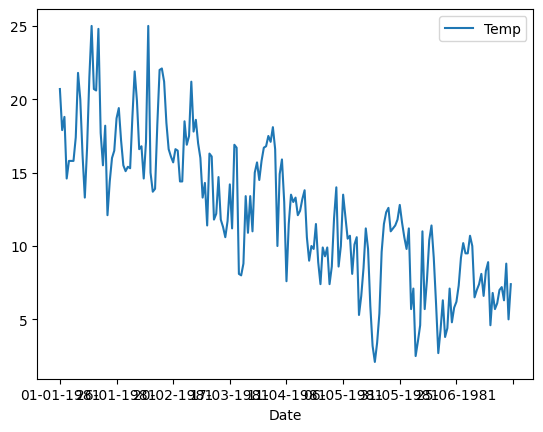

In [37]:
df[:200].plot()

In [36]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df['Temp'], autolag='AIC')
print("1. ADF: ", dftest[0])
print("2. P-value: ", dftest[1])
print("3. Num of Lags: ", dftest[2])
print("4. Num of observations used for ADF Regression and critical values calculation: ", dftest[3])
print("5. Critical values: ")
for key, value in dftest[4].items():
  print("\t%s: %.3f" % (key, value))

1. ADF:  -4.4448049246117
2. P-value:  0.0002470826300360994
3. Num of Lags:  20
4. Num of observations used for ADF Regression and critical values calculation:  3629
5. Critical values: 
	1%: -3.432
	5%: -2.862
	10%: -2.567


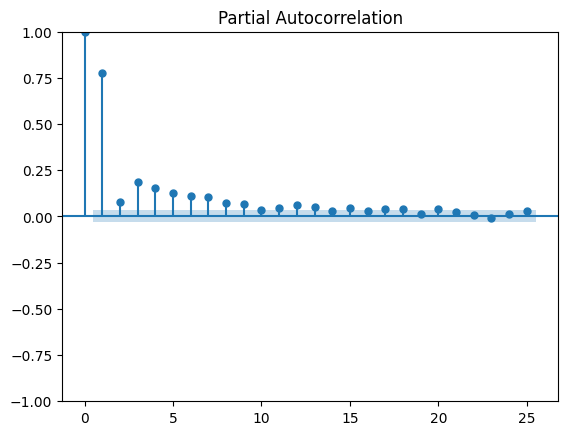

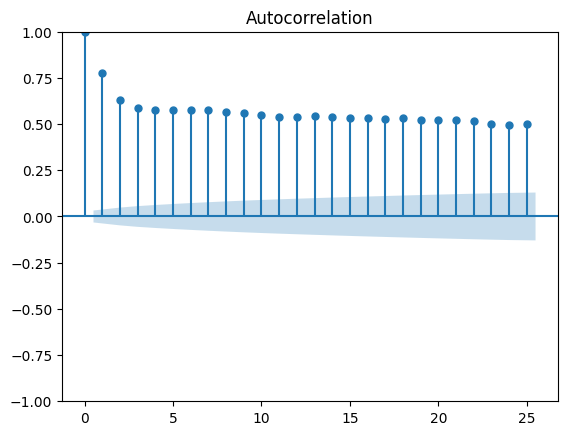

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pacf=plot_pacf(df['Temp'], lags=25)
acf=plot_acf(df['Temp'], lags=25)

In [39]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [40]:
model=AutoReg(train, lags=10).fit()

In [41]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Fri, 28 Jun 2024   AIC                          16775.028
Time:                        08:15:43   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [42]:
pred=model.predict(start=len(train), end=len(X)-1, dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


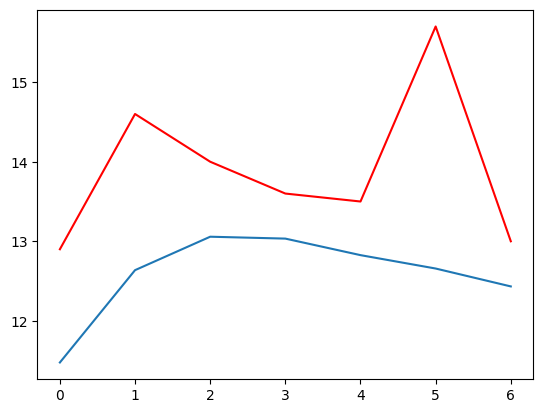

In [43]:
pyplot.plot(pred)
pyplot.plot(test, color='red')
print(pred)

In [47]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test, pred))
print(rmse)

1.563819622086056


In [48]:
pred_future=model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
print("The future pred for next week", pred_future)
print("Number of predictions made\t" , len(pred_future))

The future pred for next week [12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]
Number of predictions made	 7
